# Solving Poisson's Equation Numerically using the Finite-Difference Method

The Finite Difference Method is a numerical technique used to solve a range of Ordinary and Partial Differential Equations. It involves approximating the derivatives in the differential equation using finite differences, allowing us to convert the differential equation into a system of algebraic equations. By discretizing the domain into a grid of points, we can solve these equations iteratively to obtain numerical solutions.

In the context of solving Poisson's equation, which relates the Laplacian of the electric potential to a given charge distribution, the Finite Difference Method provides an effective approach. By discretizing the domain and approximating the derivatives using finite differences, we can construct a system of algebraic equations that relates the electric potential at each grid point to its neighboring points.

To solve Poisson's equation numerically using the Finite Difference Method, we first discretize the domain into a grid, specifying the charge distribution and boundary conditions. Then, we construct an operator matrix that represents the discrete Laplacian operator. By solving the resulting system of linear equations, we obtain the electric potential at each grid point, allowing us to determine the potential at any desired location.

### Theory

Poisson's equation (in 3 dimensions) is 
$$\nabla^2 U = -\rho$$
$$\implies \frac{\partial^2 U(x, y, z)}{\partial x^2} + \frac{\partial^2 U(x, y, z)}{\partial y^2} + \frac{\partial^2 U(x, y, z)}{\partial z^2} = -\rho(x,y,z)$$

Where $\rho$ is the charge density at a point, and $U$ is the electric potential at a point. Both are scalar functions.

Let's take Poisson's equation to be in 2 dimensions:

$$\frac{\partial^2 U(x, y, z)}{\partial x^2} + \frac{\partial^2 U(x, y, z)}{\partial y^2} = -\rho(x,y)$$

We know that the partial derivative w.r.t. a variable of a multivariate function (i.e. a function dependent on multiple variables) is simply the change in the function w.r.t. change in _only_ this variable.

We also know of the approximation to the derivative of a function in 1D (i.e. dependent on only one variable) is:

$$f'(x) = \frac{f(x + h/2) - f(x - h/2)}{h}$$

We can derive an approximation to the second derivative using the approximation for the first derivative:

$$f''(x) = \frac{f'(x + h/2) - f'(x - h/2)}{h}$$
$$= \frac{(\frac{f(x + h/2 + h/2) - f(x + h/2 - h/2)}{h}) - (\frac{f(x - h/2 + h/2) - f(x - h/2 - h/2)}{h})}{h}$$
$$=  \frac{f(x + h) - 2f(x) + f(x - h)}{h^2}$$

**Approximation of second derivative** <br>
Taylor expansion of f(x-h), f(x+h)
$$f(x-h)=f(x)-hf'(x)+\frac{h^{2}}{2!}f''(x)-.....$$  <br>
$$f(x+h)=f(x)+hf'(x)+\frac{h^{2}}{2!}f''(x)+.....$$  <br>
gives $$f''(x)=  \frac{f(x + h) - 2f(x) + f(x - h)}{h^2}$$

**Discretization** <br>
Let us assign the indices $(i, j)$ to the (discretized) coordinate $(x = i*h,y = j*h)$, where $i$ and $j$ are integers.

Thus we can also denote $U(x = i*h, y = j*h)$ as $U_{ij}$. 
Also denote $h$ as $\Delta i$.  
In fact, if the coordinate grid is not of the same scale in the two axes i.e. $(x, y) = (i*h,j*k)$, then we write $h, k = \Delta i, \Delta j$.  

For the charge distribution $\rho$, we can discretize it by finding the average charge within a grid cell and taking that to be the value of $\rho_{i,j}$.

Now, since the partial derivative of a function is essentially a 1D derivative over a particular variable, with all other variables appearing to be constant, we can write:

$$\frac{\partial^{2}U(x,y)}{\partial x^2} = \frac{U(x + h, y) - 2U(x, y) + U(x - h, y)}{h^2}$$
$$ = \frac{1}{\Delta i \Delta j}( U_{i + 1, j} - 2U_{i,j} + U_{i - 1, j})$$

Similarly,
$$\frac{\partial^{2}U(x,y)}{\partial y^2} = \frac{1}{\Delta i \Delta j}( U_{i, j + 1} - 2U_{i,j} + U_{i, j - 1})$$

Plugging these results into Poisson's equation gives us:

$$U_{i + 1, j} + U_{i, j + 1} + U_{i - 1, j} + U_{i, j - 1} - 4U_{i,j} =-( \Delta i \Delta j) \rho_{i,j}$$

Which, as you can see, is an equation for $U_{i,j}$ given in terms of its neighboring points.

To solve Poisson's equation, we aim to find the function U(x, y) that satisfies the equation given the specified charge distributions. By discretizing the coordinate space into a 10x10 grid(N=100), we can represent the equation as a system of linear equations. The unknowns in these equations are the values of U at each grid point, with i and j ranging from 0 to 9. The boundary conditions are set such that the potential at the boundary points is assumed to be zero. Solving this system of linear equations allows us to obtain the numerical values of U at all grid points, representing the electric potential within the system.

### Implementation
We write down the collection of all variables $U_{i,j}$ as a single vector by flattening the $U$ matrix into one dimension, and making the correct matrix elements to be 1 or -4 such that we get the same set of equations as in the discretized Poisson Equation.

Here's what flattening a $2 \times 2$ square matrix looks like:

$$\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix} \quad \underrightarrow{\text{flatten}} \quad 
\begin{bmatrix}
a_{11}  \\
a_{12} \\
a_{21} \\
a_{22} \\
\end{bmatrix}
$$
Thus, we get the matrix equation
$$M U_{flat} = -\rho_{flat}$$
Where $M$ is the Matrix constructed for the Laplacian Operator $\nabla^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2}$, and $U_{flat}$, $\rho_{flat}$ are the flattened vectors of $U$, $\rho$

We get $U_{flat}$ by solving this system of linear equations, and finally, get $U$ by reshaping $U_{flat}$ back into a square grid.

**Example:** Consider a 3x3 grid of points (so the flattened $U$ and $\rho$ vectors have 9 elements). Write the Poisson equation as a matrix equation, with $\rho = 1$ at the central point and 0 elsewhere.
$$ \begin{bmatrix}
-4 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
1 & -4 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 1 & -4 & 0 & 0 & 1 & 0 & 0 & 0\\
1 & 0 & 0 & -4 & 1 & 0 & 1 & 0 & 0\\
0 & 1 & 0 & 1 & -4 & 1 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 1 & -4 & 0 & 0 & 1\\
0 & 0 & 0 & 1 & 0 & 0 & -4 & 1 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 1 & -4 & 1\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & -4\\
\end{bmatrix}
\begin{bmatrix}
U_{11} \\ U_{12} \\ U_{13} \\
U_{21} \\ U_{22} \\ U_{23} \\
U_{31} \\ U_{32} \\ U_{33}
\end{bmatrix} = 
(-\Delta i \Delta j)\begin{bmatrix}
0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0
\end{bmatrix}$$

**Source:** [Wikipedia](https://en.wikipedia.org/wiki/Discrete_Poisson_equation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
N = 100
#define our N x N charge distribution grid
cd_grid = np.zeros(shape=(N,N))

#set boundary charge distribution; you can set it to anything you want
cd_grid[N//2 + 10,N//2] = 1
cd_grid[N//2 - 10,N//2] = -1

cd_grid[0,:] = 1
cd_grid[-1,:] = -1

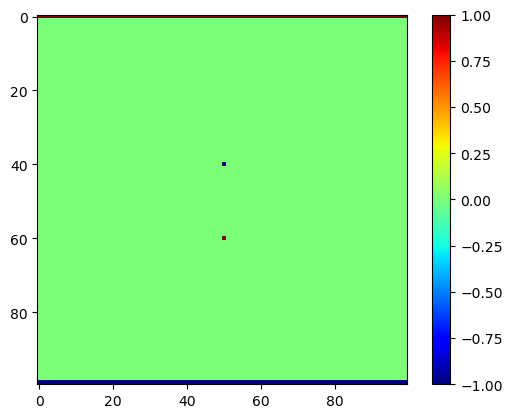

In [3]:
#show the charge distribution grid before we start
plt.imshow(cd_grid, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.show()

In [4]:
#flatten the charge distribution grid into 1 dimension
cd_flat = cd_grid.flatten()

#now, we will define the operator matrix
operator = np.zeros((N**2,N**2))

#we will implement the Laplacian operator in matrix form
def make_laplacian_operator(myoperator):
  """ input: myoperator, a N**2 x N**2 matrix with all it's elements zero

      output: a N**2 x N**2 matrix with its element values such that
      the U_flat vector, when matrix multiplied by the operator,
      gives us the left hand sides of the set of equations
      (one for each value of i, j) in the discrete Poisson equation .
  """
  for i in range(N**2):  # nested for loop to iterate over all the elements
    for j in range(N**2):
      if i == j:
        myoperator[i, j] = -4  # Diagonal elements
      elif (j == i + 1 and (i+1) % N != 0) or (j == i - 1 and i % N != 0):
        myoperator[i, j] = 1  # Elements corresponding to adjacent grid points
      elif j == i + N or j == i - N:
        myoperator[i, j] = 1  # Elements corresponding to adjacent grid points
      else:
        myoperator[i, j] = 0  # All other elements   
    
  return myoperator

#apply this function
operator = make_laplacian_operator(operator)

Now that we have converted our differential equation into a matrix equation, all that remains is to solve the matrix equation, which is 

$$M U_{flat} = -\rho_{flat}$$

where $M$ is your ```operator``` matrix, and $\rho_{flat}$ is just ```cd_flat```. You need to obtain $U_{flat}$ by solving this matrix equation, which is just a system of linear equations where the variables are the elements of $U_{flat}$.

In [5]:
def solve_system_lineq(operator, cd_flat):
  """inputs:
      operator, an N**2 x N**2 matrix
      cd_flat, a vector of length N**2

     output:
      U_flat, a vector of length N**2 which is the solution to the linear system of equations -
      operator @ U_flat = cd_flat, where @ denotes matrix multiplication
  """

  U_flat = np.zeros(N**2)  # Initial guess for U_flat
  max_iterations = 1000  # Maximum number of iterations
  tolerance = 1e-6  # Tolerance for convergence

  for _ in range(max_iterations):
        delta = 0  # Variable to track the maximum difference in each iteration
        for i in range(N**2):
            old_value = U_flat[i]  # Store the previous value of U_flat[i]
            sum1 = np.dot(operator[i, :i], U_flat[:i])
            sum2 = np.dot(operator[i, i + 1:], U_flat[i + 1:])
            U_flat[i] = (cd_flat[i] - sum1 - sum2) / operator[i, i]
            diff = abs(U_flat[i] - old_value)  # Calculate the difference
            if diff > delta:
                delta = diff  # Update the maximum difference
        if delta < tolerance:
            break
  return U_flat

#apply this function
solution = solve_system_lineq(operator, cd_flat)

In [6]:
#reshape U_flat into U
U = solution.reshape((N,N))

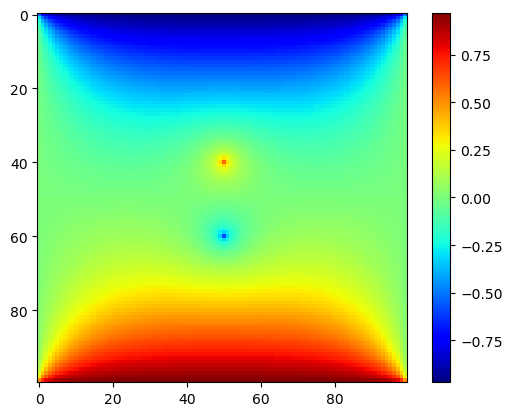

In [7]:
#display the solution U
plt.imshow(U, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.show()

## Optimization

In particular, a serious problem with the implementation above is that it wastes a LOT of memory; for N = 100, your operator matrix is of the size 10^4 x 10^4 i.e 10^8 elements, most of which are zero.

The implementation below avoid this wasted space by using sparse matrices instead of "normal" matrices. Sparse matrices cleverly store only the nonzero matrix elements to save space. Also, we are solving the system of linear equations using the function scipy.spsolve (the equivalent for 'normal' matrices is np.linalg.solve). These optimizations enable you to use N = 1000 or beyond, which would require a ridiculous amount of time and memory in your previous implementation!

In [ ]:
#we can significantly free up memory and speed up by using a sparse matrix, which is space efficient for matrices with a large number of zero elements
from scipy.sparse import lil_matrix, csr_matrix #lil_matrix is a sparse matrix format that allows for efficient matrix modifications
from scipy.sparse.linalg import spsolve


N = 1000
#define our N x N condition grid
cd_grid = np.zeros(shape=(N,N))

#set charge distribution
cd_grid[0,:] = 1
cd_grid[-1,:] = -1
cd_grid[:,0] = 1
cd_grid[:,-1] = -1

cd_flat = cd_grid.flatten()


operator_sparse = lil_matrix((N**2,N**2))
operator_sparse = make_laplacian_operator(operator_sparse)

In [ ]:
#we obtain the solution by inverting the operator matrix
solution_sparse = spsolve(operator_sparse.tocsr(), cd_flat) # spsolve works with csr_matrix and not lil_matrix

#we reshape the solution
U_sparse = solution_sparse.reshape((N,N))

#display the solution U
plt.imshow(U_sparse, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
# let us wrap everything neatly into a function that takes in the Charge Distribution and returns the solution
# let's also make it so that we can choose between the sparse and non-sparse solution

def Poisson_solver_nosparse(cd_grid):
    N = cd_grid.shape[0]
    cd_flat = cd_grid.flatten()
    operator = make_laplacian_operator(np.zeros((N**2,N**2)))
    solution = solve_system_lineq(operator, cd_flat)
    U = solution.reshape((N,N))
    return U

def Poisson_solver_sparse(cd_grid):
    N = cd_grid.shape[0]
    cd_flat = cd_grid.flatten()
    operator_sparse = make_laplacian_operator(lil_matrix((N**2,N**2)))
    solution_sparse = spsolve(operator_sparse.tocsr(), -cd_flat) #you can look up scipy.sparse.linalg.spsolve for more details
    U_sparse = solution_sparse.reshape((N,N))
    return U_sparse

def Poisson_solver(cd_grid, sparse=True):
    if sparse:
        return Poisson_solver_sparse(cd_grid)
    else:
        return Poisson_solver_nosparse(cd_grid)

#also let us wrap the plotting into a function
def plot_solution(U, cmap='jet'):
    plt.imshow(U, cmap=cmap, interpolation='nearest')
    plt.colorbar()
    plt.show()

In [ ]:
#let's try out implementation on a bunch of interesting charge distributions
N = 100
#simulating two point charges
cd_grid = np.zeros(shape=(N,N))
cd_grid[N//2,N//2 - 10] = 1
cd_grid[N//2,N//2 + 10] = 1
U = Poisson_solver(cd_grid)

In [ ]:
#here's the charge distribution plot
plot_solution(cd_grid)
#here's the solution plot
plot_solution(U)

In [ ]:
#charge distribution simulating a dipole
cd_grid = np.zeros(shape=(N,N))
cd_grid[N//2,N//2 - 5] = 10000
cd_grid[N//2,N//2 + 5] = -10000
U = Poisson_solver(cd_grid)

In [ ]:
#here's the charge distribution plot
plot_solution(cd_grid)

#here's the solution plot
plot_solution(U)

In [ ]:
#simulating a 2 point charges and a two charged plates
N = 100

cd_grid = np.zeros(shape=(N,N))
cd_grid[N//2 + 10,N//2] = 1
cd_grid[N//2 - 10,N//2] = -1

cd_grid[0,:] = 1
cd_grid[-1,:] = -1

U = Poisson_solver(cd_grid)
plot_solution(cd_grid)
plot_solution(U)

In [ ]:
plot_solution(U, 'inferno') #looks epic!

In [ ]:
cd_grid = np.zeros(shape=(N,N))
cd_grid[N//3:2*N//3,N//3] = 1
cd_grid[N//3:2*N//3,2*N//3] = -1

U = Poisson_solver(cd_grid)

plot_solution(cd_grid, 'inferno')
plot_solution(U, 'inferno')